In [75]:
import numpy as np
import random as rn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

In [76]:
data = pd.read_csv("C:\pingwiny.csv")

In [77]:
features = ['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)']
data = data[features]
data = data.dropna()
data = data.reset_index(drop=True)
data

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0
4,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0
...,...,...,...,...,...
337,Chinstrap penguin (Pygoscelis antarctica),55.8,19.8,207.0,4000.0
338,Chinstrap penguin (Pygoscelis antarctica),43.5,18.1,202.0,3400.0
339,Chinstrap penguin (Pygoscelis antarctica),49.6,18.2,193.0,3775.0
340,Chinstrap penguin (Pygoscelis antarctica),50.8,19.0,210.0,4100.0


In [78]:
#FUNKCJE DO DZIAŁANIA NA BAZIE
class DataProcesing:
    @staticmethod
    #shuffle set
    def tasowanie(x):
        for i in range(len(x)-1,0,-1):
            j = rn.randint(0,i-1)
            x.iloc[i],x.iloc[j] = x.iloc[j],x.iloc[i]
    @staticmethod
    #split set
    def podzial(x,p):
        return x[:p],x[p:]
    
    def split_equal(x,k):
        pom = [0,0,0]
        train = x
        test = x
        for i in range(len(x)-1, -1, -1):
            if x.iloc[i][1] == 0:
                train = train.drop(i)
                test = test.drop(i)
                continue
            if pom[0] < k and x.iloc[i][0] == 'Adelie Penguin (Pygoscelis adeliae)':
                pom[0] += 1
                test = test.drop(i)
            elif pom[1] < k and x.iloc[i][0] == 'Gentoo penguin (Pygoscelis papua)':
                pom[1] += 1
                test = test.drop(i)
            elif pom[2] < k and x.iloc[i][0] == 'Chinstrap penguin (Pygoscelis antarctica)':
                pom[2] += 1
                test = test.drop(i)
            else:
                train = train.drop(i)
        return test, train
#KNN:
class KNN:
    def distance(v1, v2):
        pom = 0
        for i in range(len(v1)-1):
            pom += pow(v1[i]-v2[i],2)
        wyn = pow(pom, 1/2)
        return wyn
    
    def isGood(what, inWhat):
        ile = [0,0,0]
        ileW = 0
        for i in range(len(inWhat)-1):
            if inWhat[i][1] == what:
                ileW += 1
            if inWhat[i][1] == 'Adelie Penguin (Pygoscelis adeliae)':
                ile[0] += 1
            elif inWhat[i][1] == 'Gentoo penguin (Pygoscelis papua)':
                ile[1] += 1
            elif inWhat[i][1] == 'Chinstrap penguin (Pygoscelis antarctica)':
                ile[2] += 1
        ile.sort()
        if ile[-1] == ileW:
            return 1
        else:
            return 0
        
    def knn(train, wali, k):
        nn = []
        pom = [1,1,1,1]
        pom2 = [1,1,1,1]
        licznik = 0
        mianownik = 0
        licznikPin = [0,0,0]
        mianownikPin = [0,0,0]
        for n in range(k):
            nn.append((9999,'a'))
        for i in range(0, len(wali)-1, 1):
            pom[0] = wali.iloc[i][1]
            pom[1] = wali.iloc[i][2]
            pom[2] = wali.iloc[i][3]
            pom[3] = wali.iloc[i][4]
            for n in range(k):
                nn[n] = (9999,'a')
            for j in range(0, len(train)-1,1):
                pom2[0] = train.iloc[j][1]
                pom2[1] = train.iloc[j][2]
                pom2[2] = train.iloc[j][3]
                pom2[3] = train.iloc[j][4]
                if pom2[0] == 0 or pom2[1] == 0 or pom2[2] == 0 or pom2[3] == 0:
                    continue
                odl = KNN.distance(pom, pom2)
                if nn[k-1][0]>odl:
                    nn[k-1] = (odl, train.iloc[j][0])
                    nn.sort()
            licznik += KNN.isGood(wali.iloc[i][0], nn)
            mianownik += 1
            if wali.iloc[i][0] == 'Adelie Penguin (Pygoscelis adeliae)':
                licznikPin[0] += KNN.isGood(wali.iloc[i][0], nn)
                mianownikPin[0] +=1
            elif wali.iloc[i][0] == 'Gentoo penguin (Pygoscelis papua)':
                licznikPin[1] += KNN.isGood(wali.iloc[i][0], nn)
                mianownikPin[1] += 1
            elif wali.iloc[i][0] == 'Chinstrap penguin (Pygoscelis antarctica)':
                licznikPin[2] += KNN.isGood(wali.iloc[i][0], nn)
                mianownikPin[2] += 1
        return licznik/mianownik, licznikPin, mianownikPin

In [79]:
DataProcesing.tasowanie(data)
testSet, trainSet = DataProcesing.split_equal(data, 50)
testSet = testSet.reset_index(drop=True)
trainSet = trainSet.reset_index(drop=True)
#Data for decision tree
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)']
X_test = testSet[features]
X_train = trainSet[features]
features = ['Species']
y_train = trainSet[features]
y_test = testSet[features]

In [80]:
#test KNN 2
accKNN, penKNNu, penKNNd = KNN.knn(trainSet, testSet, 2)
print(accKNN)
print(penKNNu[0]/penKNNd[0])
print(penKNNu[1]/penKNNd[1])
print(penKNNu[2]/penKNNd[2])

0.9633507853403142
0.95
0.9863013698630136
0.9444444444444444


In [81]:
#test KNN 3
accKNN, penKNNu, penKNNd = KNN.knn(trainSet, testSet, 3)
print(accKNN)
print(penKNNu[0]/penKNNd[0])
print(penKNNu[1]/penKNNd[1])
print(penKNNu[2]/penKNNd[2])

0.9738219895287958
0.97
0.9863013698630136
0.9444444444444444


In [82]:
#test KNN 5
accKNN, penKNNu, penKNNd = KNN.knn(trainSet, testSet, 5)
print(accKNN)
print(penKNNu[0]/penKNNd[0])
print(penKNNu[1]/penKNNd[1])
print(penKNNu[2]/penKNNd[2])

0.9581151832460733
0.95
0.9863013698630136
0.8888888888888888


In [83]:
#test KNN test 9
accKNN, penKNNu, penKNNd = KNN.knn(trainSet, testSet, 9)
print(accKNN)
print(penKNNu[0]/penKNNd[0])
print(penKNNu[1]/penKNNd[1])
print(penKNNu[2]/penKNNd[2])

0.9633507853403142
0.97
0.9863013698630136
0.8333333333333334


In [84]:
#test KNN test 13
accKNN, penKNNu, penKNNd = KNN.knn(trainSet, testSet, 13)
print(accKNN)
print(penKNNu[0]/penKNNd[0])
print(penKNNu[1]/penKNNd[1])
print(penKNNu[2]/penKNNd[2])

0.9633507853403142
0.97
0.9863013698630136
0.8333333333333334


In [85]:
#test KNN test 23
accKNN, penKNNu, penKNNd = KNN.knn(trainSet, testSet, 23)
print(accKNN)
print(penKNNu[0]/penKNNd[0])
print(penKNNu[1]/penKNNd[1])
print(penKNNu[2]/penKNNd[2])

0.9633507853403142
0.97
0.9863013698630136
0.8333333333333334


In [100]:
#Test Decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.feature_importances_

array([0.39317942, 0.04469342, 0.47174254, 0.09038462])

In [101]:
y_train.value_counts()

Species                                  
Adelie Penguin (Pygoscelis adeliae)          50
Chinstrap penguin (Pygoscelis antarctica)    50
Gentoo penguin (Pygoscelis papua)            50
dtype: int64

In [102]:
predictions_train = dtree.predict_proba(X_train)
predictions_test = dtree.predict_proba(X_test)

In [103]:
lb = LabelBinarizer()
lb.fit_transform(y_train)
classes = ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)']
lb.classes_ = classes
train_pred_decoded = lb.inverse_transform(predictions_train)
test_pred_decoded = lb.inverse_transform(predictions_test)
print(classification_report(y_test, test_pred_decoded))
print(classification_report(y_train, train_pred_decoded))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.95      0.93      0.94       101
Chinstrap penguin (Pygoscelis antarctica)       0.71      0.83      0.77        18
        Gentoo penguin (Pygoscelis papua)       0.99      0.97      0.98        73

                                 accuracy                           0.94       192
                                macro avg       0.88      0.91      0.90       192
                             weighted avg       0.94      0.94      0.94       192

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        50
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        50
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        50

                                 accuracy                           1.00       150

In [90]:
def plot_confusion_matrix(conf_mx, classes, in_percent=False):
    if in_percent:
        conf_mx = conf_mx.astype(float)
        rows, columns = conf_mx.shape

        for x in range(columns):
            column_sum = 0.0
            for y in conf_mx[:, x]:
                column_sum += y
            for y in range(rows):
                conf_mx[y, x] = '{:.2f}'.format((conf_mx[y, x]/column_sum)*100)

    plt.figure("Confusion Matrix")
    ax = sns.heatmap(conf_mx, annot=True, yticklabels=classes, xticklabels=classes, fmt='g', cmap="rocket_r", vmin=0,
                     vmax=100)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    for i in range(conf_mx.shape[1] + 1):
        ax.axvline(i, color='white', lw=10)
    plt.ylabel("Output Class", fontsize=15)
    plt.xlabel("Target Class", fontsize=15)
    plt.draw()

In [91]:
cf = confusion_matrix(y_test['Species'], test_pred_decoded)


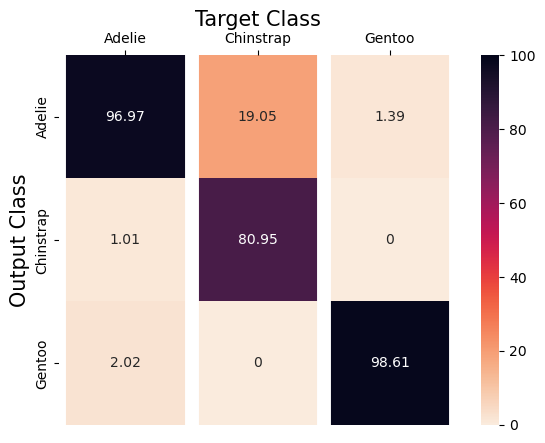

In [92]:
plot_confusion_matrix(cf, ['Adelie', 'Chinstrap', 'Gentoo'], in_percent=True)

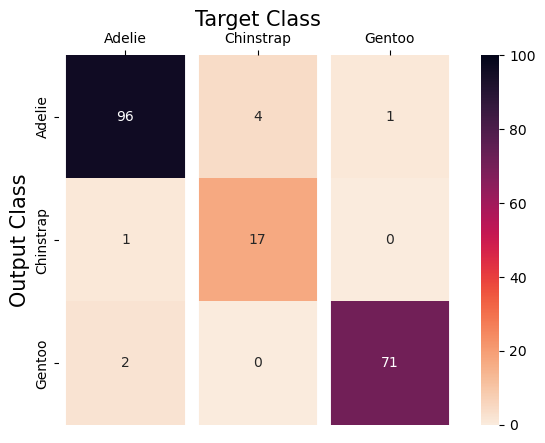

In [96]:
plot_confusion_matrix(cf, ['Adelie', 'Chinstrap', 'Gentoo'], in_percent=False)

In [94]:
print(y_train.value_counts())
print(y_test.value_counts())

Species                                  
Adelie Penguin (Pygoscelis adeliae)          50
Chinstrap penguin (Pygoscelis antarctica)    50
Gentoo penguin (Pygoscelis papua)            50
dtype: int64
Species                                  
Adelie Penguin (Pygoscelis adeliae)          101
Gentoo penguin (Pygoscelis papua)             73
Chinstrap penguin (Pygoscelis antarctica)     18
dtype: int64


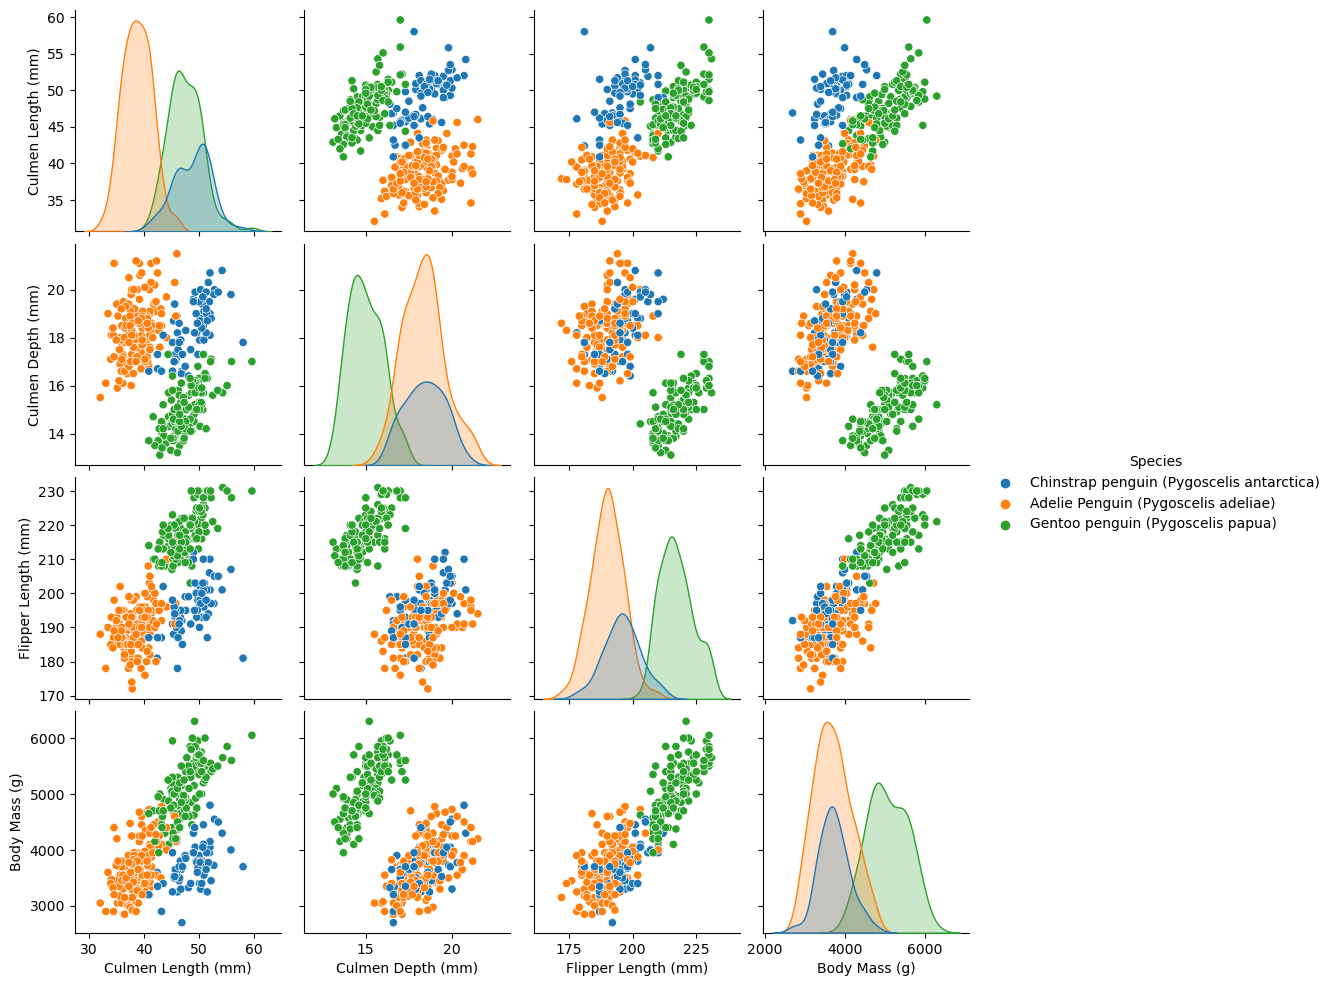

In [95]:
sns.pairplot(data,hue = "Species")

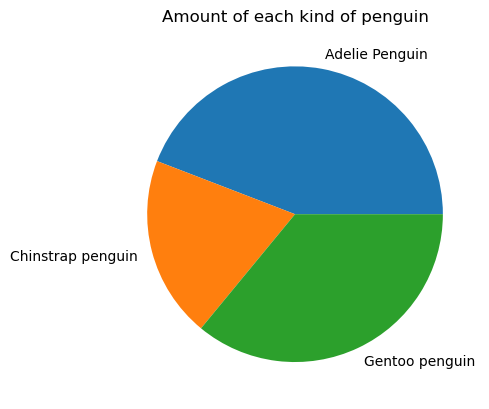

In [98]:
p = [0,0,0]
for i in range(len(data)):
    if(data.iloc[i][0]=='Adelie Penguin (Pygoscelis adeliae)'):
        p[0]+=1
    elif(data.iloc[i][0]=='Chinstrap penguin (Pygoscelis antarctica)'):
        p[1]+=1
    else:
        p[2]+=1
plt.pie(p,labels=['Adelie Penguin','Chinstrap penguin','Gentoo penguin'])
plt.title('Amount of each kind of penguin')
plt.show()